<body>
	<h1>About the Dataset</h1>
<p>
The telecoms churn dataset contains information about customers of a telecom company and whether they churned (cancelled their service) or not. It includes various features such as customer demograhics (age, gender, etc) and service usage data (number of calls, minutes, billing method, etc).
</p>

<p>This dataset consists of 7043 examples and 21 features, and is commonly used in machine learning and data analysis as a benchmark for predicting customer churn. It can be used to develop models that can identify at-risk customers and take steps to prevent churn, potentially leading to increased customer retention and revenue for the company.</p>

<p>For more info, refer to the following resources:</p>
<ul>
<li><a href="https://www.kaggle.com/blastchar/telco-customer-churn">Kaggle</a></li>
<li><a href="https://archive.ics.uci.edu/ml/datasets/Telecom+Customer+Churn">UCL</a></li>
</ul>
</body>
</html>

**About Feature**

---
- **customerID**: Customer ID
- **gender**: Whether the customer is a male or a female
- **Senior Citizen**: Whether the customer is a senior citizen or not (1, 0)
- **Partner**: Whether the customer has a partner or not (Yes, No)
- **Dependents**: Whether the customer has dependents or not (Yes, No)
- **tenure**: Number of months the customer has stayed with the company
- **Phone Service**: Whether the customer has a phone service or not (Yes, No)
- **Multiple Lines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **Internet Service**: Customer’s internet service provider (DSL, Fiber optic, No)
- **Online Security**: Whether the customer has online security or not (Yes, No, No internet service)
- **Online Backup**: Whether the customer has online backup or not (Yes, No, No internet service)
- **Device Protection**: Whether the customer has device protection or not (Yes, No, No internet service)
- **Tech Support**: Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **Streaming**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **Paperless Billing**: Whether the customer has paperless billing or not (Yes, No)
- **Payment Method**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **Monthly Charges**: The amount charged to the customer monthly
- **Total Charges**: The total amount charged to the customer
- **Churn Label**: Whether the customer churned or not (Yes or No)


## Initial Plan for Data Exploration

**1. Data Overview:**
- Load the dataset and review its structure.
- Identify key columns, including customer demographics and churn status.

**2. Descriptive Analysis:**
- Obtain summary statistics for numeric columns
- Visualize the churn distribution and identify trends.

**3. Categorical Analysis:**
- Explore categorical variables
- Analyze their impact on churn rates.

**4. Churn Reasons:**
- Investigate reasons for churn.
- Understand the main drivers of customer attrition.

**5. Correlation Analysis**

**6. Hypothesis testing**
- Hypothesis(1): Phone Service Impact Churn
- Hypothesis(2): Contract Type Affects Churn
- Hypothesis(3): Seniority Affects Churn

**8. Suggestions for the next steps in analyzing the data**

**8. Summary of quality of data**

## **Importing necessary libraries**

In [ ]:
import os
import pandas as pd
from pandas import DataFrame

pd.set_option("display.max_columns", 50)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import chi2_contingency
from scipy.stats import normaltest, shapiro
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

import matplotlib

matplotlib.rcParams["axes.labelsize"] = 9
matplotlib.rcParams["legend.fontsize"] = 9
matplotlib.rcParams["ytick.labelsize"] = 9
matplotlib.rcParams["xtick.labelsize"] = 9
# plt.style.use('classic')

# Overview of Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data into pandas dataframe

df = pd.read_csv("/content/drive/MyDrive/Placement projects/Telco_customer_churn.csv")
df.head(4)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved


In [ ]:
n_rows, n_columns = df.shape
print(f"Number of columns: {n_columns} columns\nNumber of rws: {n_rows} rows")

Number of columns: 33 columns
Number of rws: 7043 rows


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# Descriptive Analysis

<font color=#0b5bdb>**1. Total charge should be a float but it showing as object. We will convert it to float.**</font>

In [ ]:
total_charge = df["Total Charges"]
missing = total_charge[~total_charge.str.replace(".", "").str.isdigit()]
print("Number of missing total charge: ", len(missing))
missing.head()

Number of missing total charge:  11


,Total Charges
2234,
2438,
2568,
2667,
2856,


---
<p>As we can see in the dataframe above, the total charge column has some missing values.</p>

In [ ]:
# Coverting the total charge column to numeric
df["Total Charges"] = df["Total Charges"].apply(pd.to_numeric, errors="coerce")

<font color=#0b5bdb>**2. Displaying summary statistics of the numeric columns**</font>

In [ ]:
styled_df = (
    df.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_df

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
mean,1.000000,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.000000,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.000000,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.000000,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.000000,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.000000,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000



From the table above, total charge is showing as categorical which should not be so. It is supposed to be a numeric column. We will deal with it later.

<font color=#0b5bdb>**3. Analysis of numeric columns with barchart**</font>

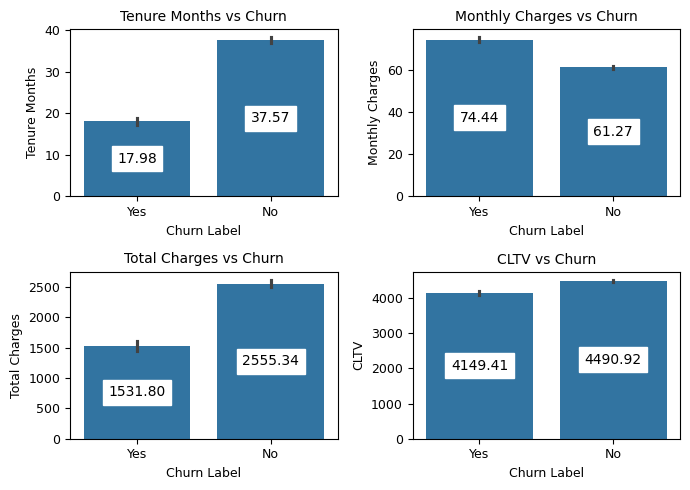

In [ ]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
# Check which columns you are trying to drop are actually present
present_columns_to_drop = [col for col in ["Churn Value", "Latitude", "Longitude", "Churn Score", "Count", "Zip Code"] if col in numeric_columns]
numeric_columns = numeric_columns.drop(present_columns_to_drop)

fig, axes = plt.subplots(2, 2, figsize=(7, 5))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    # Replace 'Churn Label' with the actual name of the column in your DataFrame
    sns.barplot(data=df, x="Churn Label", y=column, ax=ax, estimator=np.mean)
    ax.set_title(f"{column} vs Churn", fontsize=10)

    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type="center", backgroundcolor="w", fmt="%.2f"
        )
# Only add an extra axes if needed
if len(numeric_columns) % 4 != 0:
    fig.add_axes(axes[-1])
plt.tight_layout()
plt.show()

**Interpretation of results**

---
#### Tenure Months:
- For customers who have not churned (`Churn Label` = "No"), the average tenure is approximately 37.57 months.
- For customers who have churned (`Churn Label` = "Yes"), the average tenure is significantly lower, at around 17.98 months.
- This suggests that customers who have stayed longer with the company are less likely to churn, as indicated by the lower average tenure for churned customers.

#### Monthly Charges:
- For customers who have not churned, the `average monthly charges` are approximately `$61.27.`
- For customers who have churned, the average monthly charges are slightly higher, around `$74.44.`
- This indicates that customers who have churned tend to have slightly higher monthly charges on average.

#### Total Charges:
- For customers who have not churned, the `average total charges` are approximately `$2,554.77`.
- For customers who have churned, the `average total charges` are notably lower, around `$1,531.80.`
- This suggests that customers who have accumulated higher total charges are more likely to continue their subscription and not churn.

#### CLTV (Customer Lifetime Value):
- For customers who have not churned, the average `CLTV` is approximately `$4,490.92.`
- For customers who have churned, the average `CLTV` is slightly lower, at around `$4,149.41.`
- This indicates that customers who continue their subscriptions tend to have a slightly higher average `CLTV` compared to churned customers.

# Categorical Analysis

<font color=#0b5bdb>**1. Getting unique categories in the dataset**</font>

In [ ]:
def get_unique(dataframe: DataFrame):

    cat_cols = dataframe.select_dtypes(exclude="number")
    uni_values = []
    counts = []
    pct = []

    for col in cat_cols.columns:
        uni_value, count = np.unique(
            np.array(cat_cols[col], dtype=str), return_counts=True
        )
        uni_values.append(uni_value)
        counts.append(count)
        pct.append(np.round(count / count.sum() * 100, 2))

    return pd.DataFrame(
        {
            "dtype": cat_cols.dtypes,
            "unique_values": uni_values,
            "counts": [len(val) for val in uni_values],
            "values_count": counts,
            "pct": pct,
        }
    )

In [ ]:
get_unique(df)

,dtype,unique_values,counts,values_count,pct
CustomerID,object,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",7043,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0..."
Country,object,[United States],1,[7043],[100.0]
State,object,[California],1,[7043],[100.0]
City,object,"[Acampo, Acton, Adelanto, Adin, Agoura Hills, ...",1129,"[4, 4, 5, 4, 5, 4, 4, 8, 4, 4, 4, 4, 10, 4, 4,...","[0.06, 0.06, 0.07, 0.06, 0.07, 0.06, 0.06, 0.1..."
Lat Long,object,"[32.555828, -117.040073, 32.578103, -117.01297...",1652,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.0..."
Gender,object,"[Female, Male]",2,"[3488, 3555]","[49.52, 50.48]"
Senior Citizen,object,"[No, Yes]",2,"[5901, 1142]","[83.79, 16.21]"
Partner,object,"[No, Yes]",2,"[3641, 3402]","[51.7, 48.3]"
Dependents,object,"[No, Yes]",2,"[5416, 1627]","[76.9, 23.1]"
Phone Service,object,"[No, Yes]",2,"[682, 6361]","[9.68, 90.32]"


<font color=#0b5bdb>**2. Analysis of categories frequencies based on churn labels**</font>

In [ ]:
print(df.dtypes)

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


In [ ]:
categorical_columns = df.dtypes[df.dtypes == "object"].index.drop(
    [
        "Churn Label",
        "Churn Reason",
        "City",
        "CustomerID",
        "Country",
        "State",
        "Lat Long",
    ]
)

categorical_counts = pd.DataFrame(
    columns=["No", "Yes"], index=pd.MultiIndex.from_tuples([("Group 1", "A")])
)

for column in categorical_columns:
    table = pd.crosstab(index=df[column], columns=df["Churn Label"])
    index = pd.MultiIndex.from_tuples(
        list(zip([column] * df[column].nunique(), df[column].unique()))
    )
    table.index = index
    categorical_counts = pd.concat([categorical_counts, table])

categorical_counts.drop(categorical_counts.index[0], inplace=True)

categorical_counts.style.bar(
    axis=0, subset=["No", "Yes"], align=100, width=100, height=70, color="cyan"
)

<font color=#0b5bdb>**3. Visualizing the frequencies**</font>

In [ ]:
cat_cols = df[categorical_columns]

fig, axes = plt.subplots(4, 4, figsize=(20, 18), dpi=500)
axes = axes.flatten()
fig.suptitle("Churn by Category", fontsize=25, fontweight="bold", y=1)

for i, col in enumerate(cat_cols.columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue="Churn Label", ax=ax, palette="Set2")
    ax.legend(frameon=True, facecolor="inherit", shadow=True)
    ax.set_title(f"Churn by {col}", fontsize=13)
    plt.tight_layout(pad=0.6)

    for i in ax.containers:
        ax.bar_label(i, fontsize=13)

plt.tight_layout()

**Customer Churn by Category**

---
In this report, we'll examine the Telco Customer Churn dataset to understand customer churn behavior. We've analyzed various categorical variables in relation to the "Churn Label," which indicates whether a customer has churned ("Yes") or not ("No").

### Gender
- Male: `2549` customers (No Churn: `2549`, Churn: `939`)
- Female: `2625` customers (No Churn: `2625`, Churn: `930`)

### Senior Citizen
- No: `4508` customers (No Churn: `4508`, Churn: `1393`)
- Yes: `666` customers (No Churn: `666`, Churn: `476`)

### Partner
- No: `2441` customers (No Churn: `2441`, Churn: `1200`)
- Yes: `2733` customers (No Churn: `2733`, Churn: `669`)

### Dependents
- No: `3653` customers (No Churn: `3653`, Churn: `1763`)
- Yes: `1521` customers (No Churn: `1521`, Churn: `106`)

### Phone Service
- Yes: `512` customers (No Churn: `512`, Churn: `170`)
- No: `4662` customers (No Churn: `4662`, Churn: `1699`)

### Multiple Lines
- No: `2541` customers (No Churn: `2541`, Churn: `849`)
- Yes: `512` customers (No Churn: `512`, Churn: `170`)
- No phone service: `2121` customers (No Churn: `2121`, Churn: `850`)

### Internet Service
- DSL: `1962` customers (No Churn: `1962`, Churn: `459`)
- Fiber optic: `1799` customers (No Churn: `1799`, Churn: `1297`)
- No: `1413` customers (No Churn: `1413`, Churn: `113`)

### Online Security
- Yes: `2037` customers (No Churn: `2037`, Churn: `1461`)
- No: `1413` customers (No Churn: `1413`, Churn: `113`)
- No internet service: `1724` customers (No Churn: `1724`, Churn: `295`)

### Online Backup
- Yes: `1855` customers (No Churn: `1855`, Churn: `1233`)
- No: `1413` customers (No Churn: `1413`, Churn: `113`)
- No internet service: `1906` customers (No Churn: `1906`, Churn: `523`)

### Device Protection
- No: `1884` customers (No Churn: `1884`, Churn: `1211`)
- Yes: `1413` customers (No Churn: `1413`, Churn: `113`)
- No internet service: `1877` customers (No Churn: `1877`, Churn: `545`)

### Tech Support
- No: `2027` customers (No Churn: `2027`, Churn: `1446`)
- Yes: `1413` customers (No Churn: `1413`, Churn: `113`)
- No internet service: `1734` customers (No Churn: `1734`, Churn: `310`)

### Streaming TV
- No: `1868` customers (No Churn: `1868`, Churn: `942`)
- Yes: `1413` customers (No Churn: `1413`, Churn: `113`)
- No internet service: `1893` customers (No Churn: `1893`, Churn: `814`)

### Streaming Movies
- No: `1847` customers (No Churn: `1847`, Churn: `938`)
- Yes: `1413` customers (No Churn: `1413`, Churn: `113`)
- No internet service: `1914` customers (No Churn: `1914`, Churn: `818`)

### Contract
- Month-to-month: `2220` customers (No Churn: `2220`, Churn: `1655`)
- Two year: `1307` customers (No Churn: `1307`, Churn: `166`)
- One year: `1647` customers (No Churn: `1647`, Churn: `48`)

### Paperless Billing
- Yes: `2403` customers (No Churn: `2403`, Churn: `469`)
- No: `2771` customers (No Churn: `2771`, Churn: `1400`)

### Payment Method
- Mailed check: `1286` customers (No Churn: `1286`, Churn: `258`)
- Electronic check: `1290` customers (No Churn: `1290`, Churn: `232`)
- Bank transfer (automatic): `1294` customers (No Churn: `1294`, Churn: `1071`)
- Credit card (automatic): `1304` customers (No Churn: `1304`, Churn: `308`)

These insights can help identify patterns influencing customer churn, enabling data-driven decisions for customer retention strategies.


<font color=#0b5bdb>**4. Analysis of churn rate**</font>

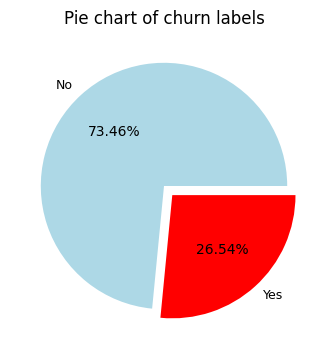

In [ ]:
# Getting a sense of the percentage of churn labels
churn_label_count = df["Churn Label"].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
)
plt.title("Pie chart of churn labels")
plt.show()

From the above plot, we can see that churn rate is `26.54%`

# Analysis of the reasons customers churn

<font color=#0b5bdb>**1. Displaying the results in dataframe**</font>

In [ ]:
reasons = df["Churn Reason"][df["Churn Reason"].notna()]
reasons = reasons.value_counts().to_frame()
reasons.index.name = "Churn Reason"
reasons.columns = ["counts"]
reasons = reasons.assign(percent=lambda x: x / reasons["counts"].sum())

formater = lambda x: f"{x:.2%}"
reasons["percent"] = reasons.percent.apply(formater)
reasons.reset_index(inplace=True)
reasons

,Churn Reason,counts,percent
0,Attitude of support person,192,10.27%
1,Competitor offered higher download speeds,189,10.11%
2,Competitor offered more data,162,8.67%
3,Don't know,154,8.24%
4,Competitor made better offer,140,7.49%
5,Attitude of service provider,135,7.22%
6,Competitor had better devices,130,6.96%
7,Network reliability,103,5.51%
8,Product dissatisfaction,102,5.46%
9,Price too high,98,5.24%


<font color=#0b5bdb>**2. Displaying the results in a plot - Treemap**</font>

In [ ]:
fig = px.treemap(
    data_frame=reasons,
    path=["Churn Reason"],
    values="counts",
    custom_data=["percent"],
    width=800,
    height=500,
    title="Churn Reasons Treemap",
)

fig.update_traces(
    hovertemplate="%{label}<br>Count: %{value}<br>Percentage: %{customdata[0]}",
    textinfo="label+value+percent entry"
)
fig.update_layout(margin=dict(t=30, l=10, r=10, b=10), title_x=0.5, title_y=0.96)
fig.show()

**Interpretation of Results**

---
The analysis of churn reasons provides valuable insights into the factors contributing to customer churn. Several key findings emerge from the data. Firstly, approximately `10.27%` of customers mentioned the `"Attitude of Support Person"` as their reason for churning, underscoring the significance of excellent customer service. Another `10.11%` cited `"Competitor Offered Higher Download Speeds,"` emphasizing the importance of offering competitive internet speeds. Additionally, `"Competitor Offered More Data"` was a reason for `8.67%` of customers, indicating that data offerings play a critical role in customer retention.

A noteworthy observation is that `8.24%` of customers simply mentioned `"Don't Know"` as their churn reason. This suggests a need for more comprehensive customer feedback and communication to address concerns. Furthermore, the data revealed that `7.49%` of customers left because a competitor made a better offer, highlighting the importance of staying competitive in the market. Customer satisfaction also hinges on the `"Attitude of Service Provider"` (`7.22%`) and having access to `"Competitor Had Better Devices"` (`6.96%`). These insights underline the multi-faceted nature of customer churn, emphasizing the need for comprehensive strategies to enhance customer experience, product offerings, and competitive pricing.


# Correlation Analysis

<p style="font-size: 16px;">Pearson correlation coefficient to determine the columns that are correlated with each so that we deal with them using PCA (Principal Component Analysis)</p>

<p style="font-size: 20px;"> $r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum({x_i - \bar{x}})^2 \sum({y_i - \bar{y}})^2}}$<p/>

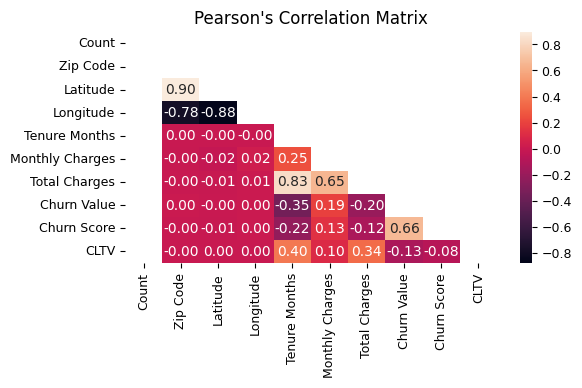

In [ ]:
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linecolor="c")
plt.title("Pearson's Correlation Matrix")
plt.show()

**Interpretation of correlation coefficient**

---
>Correlation coefficients provide insights into the relationships between various attributes in the dataset. Here, I'll focus on a few noteworthy correlations:


1. `Tenure Months and Total Charges (0.825)`: There is a strong positive correlation between tenure (number of months a customer has stayed with the company) and total charges. This suggests that customers who have been with the company for a longer time tend to accumulate higher total charges. It's an intuitive relationship as long-term customers are likely to pay more over time.

2. `Tenure Months and Monthly Charges (0.248)`: Tenure months and monthly charges have a positive correlation, but it's relatively weaker. This indicates that, in general, longer-tenured customers tend to have slightly higher monthly charges. It's a subtle trend, suggesting that some long-term customers might choose higher-priced services.

3. `Total Charges and CLTV (0.341)`: There's a positive correlation between total charges and Customer Lifetime Value (CLTV), indicating that customers who generate higher total charges are more valuable to the company in the long run. This correlation underscores the importance of retaining high-spending customers for business profitability.

These correlations provide a foundation for further analysis, such as identifying key factors influencing customer churn and understanding the drivers behind customer value and loyalty. Understanding these relationships can be valuable for decision-making and customer retention strategies.


# Feature Engineering

<font color=#0b5bdb>**1. Dropping irrelevant columns from our analysis.**</font>

In [ ]:
df.drop(
    columns=["CustomerID", "Country", "State", "Lat Long", "Zip Code", "Count"],
    inplace=True,
    errors="ignore",
)

<font color=#0b5bdb>**2. Dealing with missing values**</font>

In [ ]:
df.isna().sum()

,0
City,0
Latitude,0
Longitude,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0


**As shown above there are `11` null values in `Total Charges` column and `5174` null values in the `Chrun Reason` column.**

The `Churn Reason` column has many missing values because most customers haven't left the company, leaving the reason field empty.

There are three methods we can approach:
- 1. Removing
- 2. Imputing
- 3. Masking

**Below I imputed the `Total Charges` column with mean**

In [ ]:
df["Total Charges"].fillna(df["Total Charges"].mean(), inplace=True) # Filling missing total charge with mean

<font color=#0b5bdb>**3. Outliers Analysis**</font>

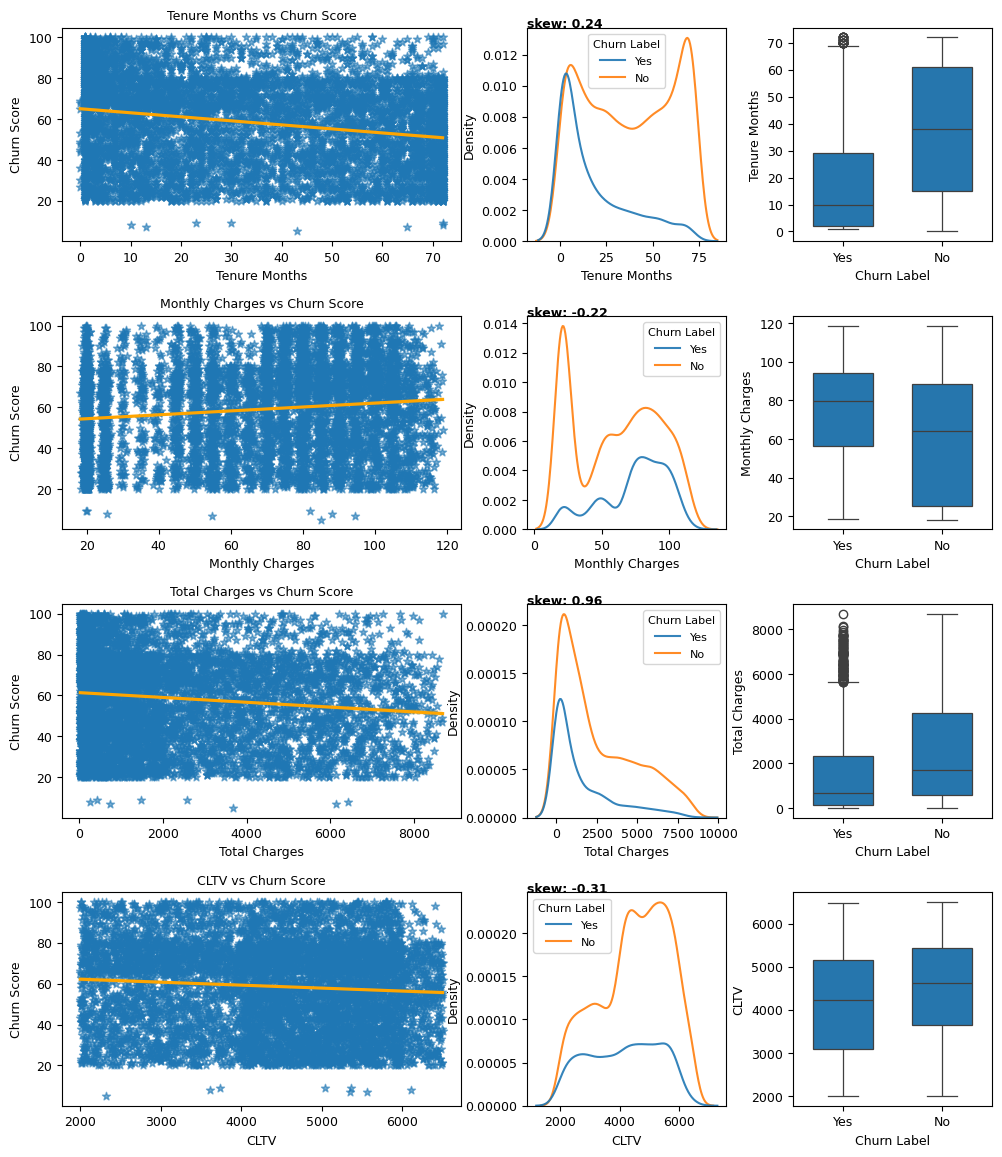

In [ ]:
# Before applying log
number_columns = df.select_dtypes("number").drop(
    columns="Latitude,Longitude,Churn Value,Churn Score".split(",")
)

skewness_before_log = df[number_columns.columns].skew()
fig, axes = plt.subplots(
    nrows=4,
    ncols=3,
    figsize=(12, 14),
    gridspec_kw={"hspace": 0.35, "wspace": 0.25, "width_ratios": [0.6, 0.3, 0.3]},
)
axes = axes.flatten()
i = 0
for column in number_columns.columns:
    ax = axes[i]
    sns.regplot(
        data=df,
        x=column,
        y="Churn Score",
        ax=ax,
        scatter_kws={"alpha": 0.6},
        marker="*",
        line_kws={"color": "orange"},
    )
    ax.set_title(f"{column} vs Churn Score", size=9)
    ax = axes[i + 1]
    sns.kdeplot(
        data=df, x=column, hue="Churn Label", ax=ax, fill=False, alpha=0.9, legend=True
    )
    skewness = skewness_before_log[column]
    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[-1],
        f"skew: {skewness:.2f}",
        size=9,
        weight="bold",
    )
    legend = ax.get_legend()
    plt.setp(legend.get_title(), fontsize=8)
    for text in legend.get_texts():
        text.set_fontsize(8)

    ax = axes[i + 2]
    sns.boxplot(
        data=df,
        x="Churn Label",
        y=column,
        ax=ax,
        width=0.6,
        saturation=0.9,
        linewidth=0.9,
    )
    i += 3


From the boxplots, we can see that there are some outliers in the `Total Charges` and `Tenure Months` columns. Also, an acceptable level of skewness is between `-0.5 and +0.5`, however, the histogram suggests that the `Total Charges` is highly skewed since it has a skewness of `0.96`.

**Solution**: We will simply apply log to the `Total Charges` column mitigate the effect of both the outliers and the deviation from normal distribution.

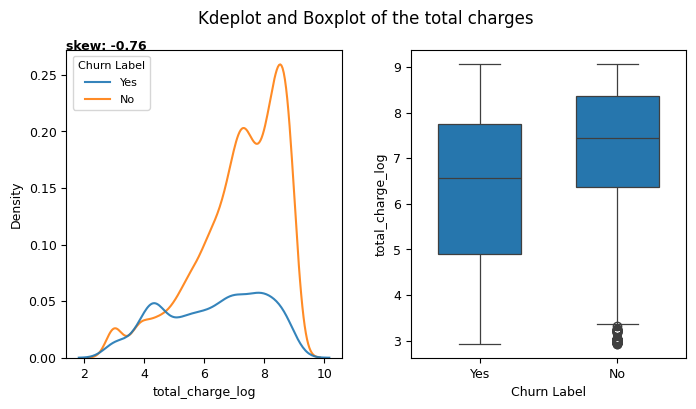

In [ ]:
# After applying log
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8, 4),
    gridspec_kw={"hspace": 0.35, "wspace": 0.25, "width_ratios": [0.3, 0.3]},
)

axes = axes.flatten()

df_copy = df.copy()
df_copy["total_charge_log"] = df_copy["Total Charges"].apply(np.log)
skewness = df_copy["total_charge_log"].skew()

ax = axes[0]
sns.kdeplot(
    data=df_copy, x="total_charge_log", hue="Churn Label", ax=ax, fill=False, alpha=0.9
)
ax.text(
    ax.get_xlim()[0], ax.get_ylim()[-1], f"skew: {skewness:.2f}", size=9, weight="bold"
)
legend = ax.get_legend()
plt.setp(legend.get_title(), fontsize=8)
for text in legend.get_texts():
    text.set_fontsize(8)

ax = axes[1]
sns.boxplot(
    data=df_copy,
    x="Churn Label",
    y="total_charge_log",
    ax=ax,
    width=0.6,
    saturation=0.9,
    linewidth=0.9,
)
plt.suptitle("Kdeplot and Boxplot of the total charges")
plt.show()

From the above plot, we can see that skewness of the `Total Charges` column has reduced to `0.76`

<font color=#0b5bdb>**4. Encoding Categorical Columns**</font>

In [ ]:
# OneHotEncoding with pandas' get dummies

df_copy = pd.get_dummies(df, columns=df.select_dtypes("O").columns)
print("Shape before encoding: ", df.shape)
print("Shape after encoding: ", df_copy.shape)

df_copy.head()

Shape before encoding:  (7043, 27)
Shape after encoding:  (7043, 1202)


,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,City_Acampo,City_Acton,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Alameda,City_Alamo,City_Albany,City_Albion,City_Alderpoint,City_Alhambra,City_Aliso Viejo,City_Alleghany,City_Alpaugh,City_Alpine,...,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Label_No,Churn Label_Yes,Churn Reason_Attitude of service provider,Churn Reason_Attitude of support person,Churn Reason_Competitor had better devices,Churn Reason_Competitor made better offer,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Deceased,Churn Reason_Don't know,Churn Reason_Extra data charges,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,33.964131,-118.272783,2,53.85,108.15,1,86,3239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,34.059281,-118.307420,2,70.70,151.65,1,67,2701,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,34.048013,-118.293953,8,99.65,820.50,1,86,5372,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,34.039224,-118.266293,49,103.70,5036.30,1,89,5340,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Applying one hot encoding has added `1175` to our columns leading to a high dimensionality in our data.

# Hypothesis Testing

**Hypothesis Testing**

---
**Hypothesis 1: Phone Service Impact Churn**
- Null Hypothesis (H0): There is no significant relationship between `Phone Service` and `Churn`.
- Alternative Hypothesis (H1): There is a significant relationship between `Phone Service` and `Churn`.

**Hypothesis 2: Contract Type Affects Churn**
- Null Hypothesis (H0): The `type of contract` does not affect the likelihood of churn.
- Alternative Hypothesis (H1): The `type of contract` significantly influences the likelihood of churn.

**Hypothesis 3: Seniority Affects Churn**
- Null Hypothesis (H0): The `Senior Citizen` does not affect the likelihood of churn.
- Alternative Hypothesis (H1): The `Senior Citizen` significantly influences the likelihood of churn.

<p>Chi Square Test to test if a categorical column has a relation with churn label
    
$\chi^{2} = \sum_{i=1}^{n} \frac{(O_i-E_i)^2}{E_i}$

In [ ]:
def chi_square_test(dataframe: DataFrame):

    columns = ["Phone Service", "Contract", "Senior Citizen"]
    p_value = []
    dofs = []
    chi_square = []
    for column in columns:
        crosstab = pd.crosstab(
            index=dataframe[column], columns=dataframe["Churn Label"]
        )
        chi_value, p, dof, ev = chi2_contingency(crosstab)
        chi_square.append(chi_value)
        dofs.append(dof)
        p_value.append(p)

    return pd.DataFrame(
        {
            "column": columns,
            "test_statistic": np.round(chi_square),
            "degree_of_freedom": dof,
            "p_value": np.round(p_value, 2),
        }
    )

In [ ]:
chi_table = chi_square_test(df)
chi_table["Decision"] = np.where(
    chi_table.p_value < 0.05, "significant", "not significant"
)
chi_table

,column,test_statistic,degree_of_freedom,p_value,Decision
0,Phone Service,1.0,1,0.34,not significant
1,Contract,1185.0,1,0.00,significant
2,Senior Citizen,159.0,1,0.00,significant


**Interpration of hypothesis results**

---
**Hypothesis 1 (Phone Service Impact Churn):**
- **Conclusion:** The p-value for the hypothesis testing related to `Phone Service` is `0.34`, which is greater than the chosen significance level (alpha). Therefore, we `fail to reject` the null hypothesis (H0). This suggests that there is `no significant evidence` to support the idea that `Phone Service` has a significant impact on churn in this dataset.

**Hypothesis 2 (Contract Type Affects Churn):**
- **Conclusion:** The p-value for the hypothesis testing related to `Contract` is `0.00`, which is less than the chosen significance level (alpha). Therefore, we `reject` the null hypothesis (H0). This indicates that there is `significant evidence` to support the idea that the `type of contract` significantly influences the likelihood of churn in this dataset.

**Hypothesis 3 (Seniority Affects Churn):**
- **Conclusion:** The p-value for the hypothesis testing related to `Senior Citizen` is `0.00`, which is less than the chosen significance level (alpha). This suggests that there is `significant evidence` to support the idea that being a `Senior Citizen` significantly influences the likelihood of churn in this dataset.

# Suggestions for the next steps in analyzing the data

---

- **Customer Segmentation**: We can explore customer segmentation to better understand different customer groups.

- **Principal Component Analysis**: We can apply PCA to reduce the dimensionality of the data and focus on more important features.

- **Machine Learning Modeling**: applying machine learning techniques to build predictive models for customer churn. We can use classification algorithms like logistic regression, decision trees, random forests, or gradient boosting to predict which customers are likely to churn.

# Summary of quality of data

---
The quality of the provided data appears to be relatively high, with a comprehensive set of variables and attributes for analyzing customer churn. The dataset includes essential information, such as customer demographics, service details, billing information, and churn labels, making it suitable for various analytical tasks. However, a thorough data cleaning process, including handling missing values, outliers, and potential inconsistencies, may be necessary before advanced analytics and modeling. Additionally, the quality of analysis and decision-making based on this data will depend on the accuracy and representativeness of the information, as well as the relevance of the features chosen for specific analytical tasks.